# tf.data

In [85]:
import os
from glob import glob

In [86]:
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [87]:
os.listdir('d:/data/졸음운전 예방을 위한 운전자 상태 정보 영상/Training/원천_bbox_통제환경/001_G1')

['001_G1_01_무광원_계기판_정상주시_20200917_182234_02144.jpg',
 '001_G1_01_무광원_계기판_정상주시_20200917_182234_02150.jpg',
 '001_G1_01_무광원_계기판_졸음재현_20200917_182234_02293.jpg',
 '001_G1_01_무광원_계기판_졸음재현_20200917_182234_02298.jpg',
 '001_G1_01_무광원_계기판_하품재현_20200917_182234_02459.jpg',
 '001_G1_01_무광원_계기판_하품재현_20200917_182234_02464.jpg',
 '001_G1_01_무광원_네비게이션_정상주시_20200917_182234_03130.jpg',
 '001_G1_01_무광원_네비게이션_정상주시_20200917_182234_03154.jpg',
 '001_G1_01_무광원_네비게이션_졸음재현_20200917_182234_03298.jpg',
 '001_G1_01_무광원_네비게이션_졸음재현_20200917_182234_03315.jpg',
 '001_G1_01_무광원_네비게이션_하품재현_20200917_182234_03446.jpg',
 '001_G1_01_무광원_네비게이션_하품재현_20200917_182234_03451.jpg',
 '001_G1_01_무광원_룸미러_정상주시_20200917_182234_02649.jpg',
 '001_G1_01_무광원_룸미러_정상주시_20200917_182234_02655.jpg',
 '001_G1_01_무광원_룸미러_졸음재현_20200917_182234_02803.jpg',
 '001_G1_01_무광원_룸미러_졸음재현_20200917_182234_02812.jpg',
 '001_G1_01_무광원_룸미러_하품재현_20200917_182234_02929.jpg',
 '001_G1_01_무광원_룸미러_하품재현_20200917_182234_02934.jpg',
 '001_G1_01_무광원_썬바이저_정상주시_20200917

In [88]:
train_img=glob('D:/data/졸음운전 예방을 위한 운전자 상태 정보 영상/Training/원천_bbox_통제환경/001_G1/*.jpg')

In [140]:
train_img

['D:/data/졸음운전 예방을 위한 운전자 상태 정보 영상/Training/원천_bbox_통제환경/001_G1\\001_G1_01_무광원_계기판_정상주시_20200917_182234_02144.jpg',
 'D:/data/졸음운전 예방을 위한 운전자 상태 정보 영상/Training/원천_bbox_통제환경/001_G1\\001_G1_01_무광원_계기판_정상주시_20200917_182234_02150.jpg',
 'D:/data/졸음운전 예방을 위한 운전자 상태 정보 영상/Training/원천_bbox_통제환경/001_G1\\001_G1_01_무광원_계기판_졸음재현_20200917_182234_02293.jpg',
 'D:/data/졸음운전 예방을 위한 운전자 상태 정보 영상/Training/원천_bbox_통제환경/001_G1\\001_G1_01_무광원_계기판_졸음재현_20200917_182234_02298.jpg',
 'D:/data/졸음운전 예방을 위한 운전자 상태 정보 영상/Training/원천_bbox_통제환경/001_G1\\001_G1_01_무광원_계기판_하품재현_20200917_182234_02459.jpg',
 'D:/data/졸음운전 예방을 위한 운전자 상태 정보 영상/Training/원천_bbox_통제환경/001_G1\\001_G1_01_무광원_계기판_하품재현_20200917_182234_02464.jpg',
 'D:/data/졸음운전 예방을 위한 운전자 상태 정보 영상/Training/원천_bbox_통제환경/001_G1\\001_G1_01_무광원_네비게이션_정상주시_20200917_182234_03130.jpg',
 'D:/data/졸음운전 예방을 위한 운전자 상태 정보 영상/Training/원천_bbox_통제환경/001_G1\\001_G1_01_무광원_네비게이션_정상주시_20200917_182234_03154.jpg',
 'D:/data/졸음운전 예방을 위한 운전자 상태 정보 영상/Training/원천_bbox_통제환경/001_G1\\001

In [141]:
path=train_img[0]

In [142]:
path

'D:/data/졸음운전 예방을 위한 운전자 상태 정보 영상/Training/원천_bbox_통제환경/001_G1\\001_G1_01_무광원_계기판_정상주시_20200917_182234_02144.jpg'

In [144]:
raw = tf.io.read_file(path)
img = tf.io.decode_image(raw)

In [146]:
img.shape, img.dtype

(TensorShape([1280, 800, 1]), tf.uint8)

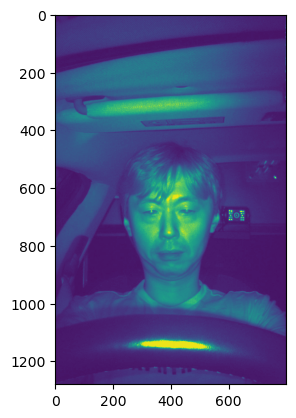

In [149]:
plt.imshow(img)
plt.show()

In [148]:
def read_image(path):
    raw = tf.io.read_file(path)
    img = tf.io.decode_image(raw)
    return img

In [91]:
dataset = tf.data.Dataset.from_tensor_slices(train_img)

In [92]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
dataset = dataset.map(read_image, num_parallel_calls=AUTOTUNE)

In [93]:
dataset= dataset.batch(32)
dataset = dataset.prefetch(AUTOTUNE)
dataset=dataset.shuffle(buffer_size=1000)
dataset = dataset.repeat()

In [94]:
next(iter(dataset))

<tf.Tensor: shape=(6, 1280, 800, 1), dtype=uint8, numpy=
array([[[[  3],
         [ 40],
         [ 35],
         ...,
         [ 45],
         [ 22],
         [ 17]],

        [[  0],
         [ 36],
         [ 32],
         ...,
         [ 33],
         [ 50],
         [146]],

        [[  0],
         [ 35],
         [ 31],
         ...,
         [ 36],
         [ 36],
         [ 69]],

        ...,

        [[  1],
         [ 35],
         [ 36],
         ...,
         [ 49],
         [ 49],
         [  7]],

        [[  2],
         [ 35],
         [ 36],
         ...,
         [ 50],
         [ 48],
         [  4]],

        [[  2],
         [ 35],
         [ 37],
         ...,
         [ 49],
         [ 46],
         [  2]]],


       [[[  1],
         [ 33],
         [ 33],
         ...,
         [ 47],
         [ 23],
         [ 16]],

        [[  0],
         [ 32],
         [ 32],
         ...,
         [ 23],
         [ 48],
         [160]],

        [[  0],
         [ 31],

In [95]:
train_img[0].split('\\')[-1].split('.')[0].split('_')[5]

'정상주시'

In [96]:
dir_list=os.listdir('d:/data/졸음운전 예방을 위한 운전자 상태 정보 영상/Training/원천_bbox_통제환경/001_G1')

In [97]:
label_names=[]

In [98]:
for dir in dir_list:
    label_names.append(dir.split('\\')[-1].split('.')[0].split('_')[5])

In [99]:
label_names = list(set(label_names))

In [100]:
label_names

['하품재현', '정상주시', '통화재현', '졸음재현']

In [101]:
def parse_label(path):
    name = path.split('\\')[-1].split('.')[0].split('_')[5]
    return np.array(name == np.array(label_names), dtype=np.float32)

In [102]:
parse_label(train_img[0])

array([0., 1., 0., 0.], dtype=float32)

In [103]:
train_y = np.array([parse_label(x) for x in train_img])

In [104]:
train_y[0]

array([0., 1., 0., 0.], dtype=float32)

In [105]:
def read_data(path, label):
    img = read_image(path)
    return img, label

In [106]:
dataset = tf.data.Dataset.from_tensor_slices((train_img,train_y))

In [107]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
dataset = dataset.map(read_data, num_parallel_calls=AUTOTUNE)
dataset= dataset.batch(32)
dataset = dataset.prefetch(AUTOTUNE)
dataset=dataset.shuffle(buffer_size=1000)
dataset = dataset.repeat()

In [122]:
next(iter(dataset))

(<tf.Tensor: shape=(32, 1280, 800, 1), dtype=uint8, numpy=
 array([[[[  2],
          [ 32],
          [ 33],
          ...,
          [ 35],
          [  9],
          [ 14]],
 
         [[  2],
          [ 32],
          [ 33],
          ...,
          [ 12],
          [ 33],
          [157]],
 
         [[  2],
          [ 31],
          [ 32],
          ...,
          [ 22],
          [ 29],
          [ 62]],
 
         ...,
 
         [[  3],
          [ 19],
          [ 23],
          ...,
          [ 22],
          [ 20],
          [  6]],
 
         [[  4],
          [ 20],
          [ 25],
          ...,
          [ 22],
          [ 20],
          [  6]],
 
         [[  4],
          [ 21],
          [ 26],
          ...,
          [ 22],
          [ 20],
          [  6]]],
 
 
        [[[  0],
          [ 34],
          [ 35],
          ...,
          [ 33],
          [ 12],
          [ 12]],
 
         [[  0],
          [ 33],
          [ 34],
          ...,
          [  7],

# ImageDataGenerator

In [138]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [139]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range= 0.2,
    height_shift_range= 0.2,
    horizontal_flip= True
)

In [ ]:
next(iter(datagen.flow ((train_x, train_y)))

# ResNet

In [124]:
import warnings
warnings.filterwarnings(action='ignore')
import seaborn as sns
import PIL
PIL.Image
import cv2
import sys
import json
import pandas as pd
import cvlib as cv
from cvlib.object_detection import draw_bbox
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Input, Add
import pathlib

In [126]:
def build_resnet(input_shape):
    inputs = Input(input_shape)

    net = Conv2D(32, kernel_size=3, strides=2, padding='same', activation='relu')(inputs)
    net = MaxPool2D()(net)

    net1 = Conv2D(64, kernel_size=1, padding='same', activation='relu')(net)
    net2 = Conv2D(64, kernel_size=3, padding='same', activation='relu')(net1)
    net3 = Conv2D(64, kernel_size=1, padding='same', activation='relu')(net2)

    net1_1 = Conv2D(64, kernel_size=1, padding='same', activation='relu')(net)
    net = Add()([net1_1, net3])

    net1 = Conv2D(64, kernel_size=1, padding='same', activation='relu')(net)
    net2 = Conv2D(64, kernel_size=3, padding='same', activation='relu')(net1)
    net3 = Conv2D(64, kernel_size=1, padding='same', activation='relu')(net2)

    net = Add()([net, net3])

    net = MaxPool2D()(net)

    net = Flatten()(net)
    net = Dense(10, activation='softmax')(net)

    model2 = tf.keras.Model(inputs=inputs, outputs=net)

    return model2

In [128]:
model2 = build_resnet((180,180,3))

In [129]:

model2.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 90, 90, 32)   896         ['input_2[0][0]']                
                                                                                                  
 max_pooling2d_1 (MaxPooling2D)  (None, 45, 45, 32)  0           ['conv2d_1[0][0]']               
                                                                                                  
 conv2d_2 (Conv2D)              (None, 45, 45, 64)   2112        ['max_pooling2d_1[0][0]']    

In [131]:
learning_rate = 0.8
opt = tf.keras.optimizers.Adam(learning_rate)
loss = tf.keras.losses.CategoricalCrossentropy

In [132]:
model2.compile(optimizer=opt, loss = loss, metrics=['accuracy'])

In [135]:
len(train_img)/32

15.1875

In [137]:
model2.fit(dataset, epochs=1, steps_per_epoch=len(train_img)//32)

TypeError: in user code:

    File "c:\Users\Ssoony\miniconda3\envs\ds_study\lib\site-packages\keras\engine\training.py", line 878, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\Ssoony\miniconda3\envs\ds_study\lib\site-packages\keras\engine\training.py", line 867, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Ssoony\miniconda3\envs\ds_study\lib\site-packages\keras\engine\training.py", line 860, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\Ssoony\miniconda3\envs\ds_study\lib\site-packages\keras\engine\training.py", line 809, in train_step
        loss = self.compiled_loss(
    File "c:\Users\Ssoony\miniconda3\envs\ds_study\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\Ssoony\miniconda3\envs\ds_study\lib\site-packages\keras\losses.py", line 142, in __call__
        return losses_utils.compute_weighted_loss(
    File "c:\Users\Ssoony\miniconda3\envs\ds_study\lib\site-packages\keras\utils\losses_utils.py", line 309, in compute_weighted_loss
        losses = tf.convert_to_tensor(losses)

    TypeError: Failed to convert elements of <keras.losses.CategoricalCrossentropy object at 0x0000023B5629D100> to Tensor. Consider casting elements to a supported type. See https://www.tensorflow.org/api_docs/python/tf/dtypes for supported TF dtypes.
